In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter

/Users/ahyeon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")

In [3]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

## GCS 

In [5]:
gcs = sub_bm[:,113]
mild = []
mod = []
sev = []
for g in gcs:
    if g <= 8:
        sev.append(g)
    elif (g >= 9 and g <=12):
        mod.append(g)
    else:
        mild.append(g)

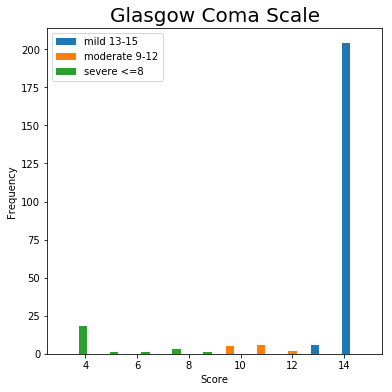

In [6]:
plt.figure(figsize=(6,6))
plt.hist([mild, mod, sev], label=['mild 13-15', 'moderate 9-12', 'severe <=8'])
plt.title('Glasgow Coma Scale', fontsize=20)
plt.legend()
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs_hist.pdf')
plt.show()

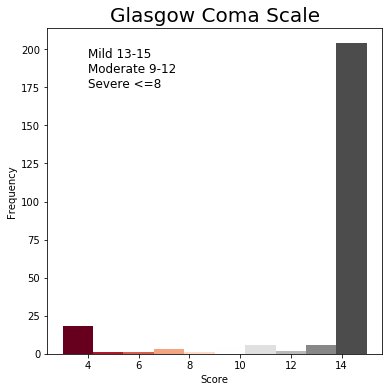

In [7]:
plt.figure(figsize=(6,6))

cm = plt.cm.get_cmap('RdGy')
n, bins, patches = plt.hist(gcs)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/10)) # notice the i/25
plt.text(4,175, 'Mild 13-15\nModerate 9-12\nSevere <=8', fontsize=12)
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Glasgow Coma Scale', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs_hist.pdf')
plt.show()

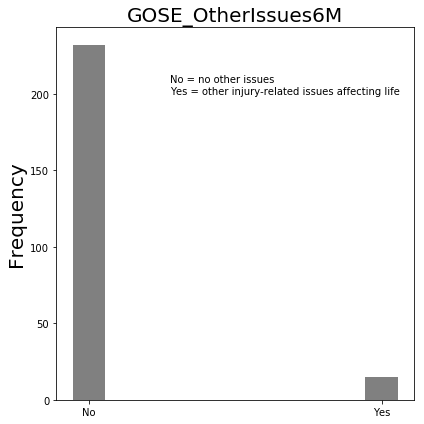

In [8]:
plt.figure(figsize=(6,6))
plt.title('GOSE_OtherIssues6M', fontsize=20)
plt.hist(sub_bm[:,29], color='grey')
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.ylabel('Frequency', fontsize=20)
plt.text(0.3,200,'No = no other issues\nYes = other injury-related issues affecting life')
plt.tight_layout()
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gose_otherissues_hist.pdf')
plt.show()

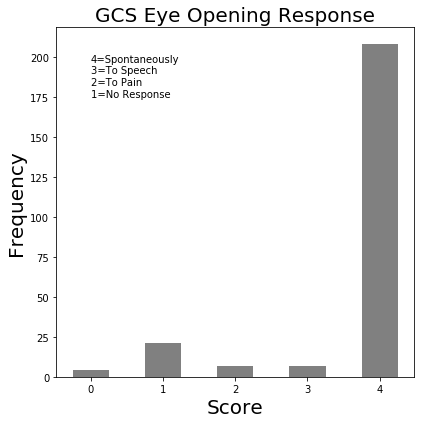

In [9]:
plt.figure(figsize=(6,6))
plt.title('GCS Eye Opening Response', fontsize=20)
plt.hist(sub_bm[:,106], align='left',bins = np.arange(0,5,0.5), color='grey')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Score', fontsize=20)
plt.xticks(np.arange(5), [0,1,2,3,4])
plt.text(0,175, '4=Spontaneously\n3=To Speech\n2=To Pain\n1=No Response')
plt.tight_layout()
# plt.savefig('/Users/ahyeon/Desktop/activ misc/admgcseyes_hist.pdf')
plt.show()

## GOSE

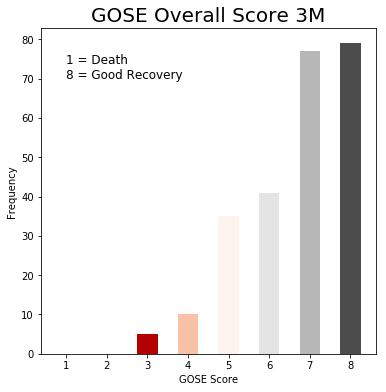

In [11]:
plt.subplots(figsize = (6,6))
cm = plt.cm.get_cmap('RdGy')
idx = np.arange(0,1,1/17)
red = (0.7, 0.0, 0.0, 1.0)
grey = (0.0, 0.0, 0.0, 0.7)
colors = [cm(j) for j in idx]
colors[14]=grey
colors[4]=red

gose_overallscore_3m = sub_oc[:,4]

n, bins, patches = plt.hist(gose_overallscore_3m, align='left', bins=np.arange(1,9,0.5))
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', colors[i]) 
    
plt.title('GOSE Overall Score 3M', fontsize=20)
plt.xlabel('GOSE Score')
plt.ylabel('Frequency')
plt.text(1,70, '1 = Death\n8 = Good Recovery',fontsize=12)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gose3m_hist.pdf')
plt.show()

## CVLT

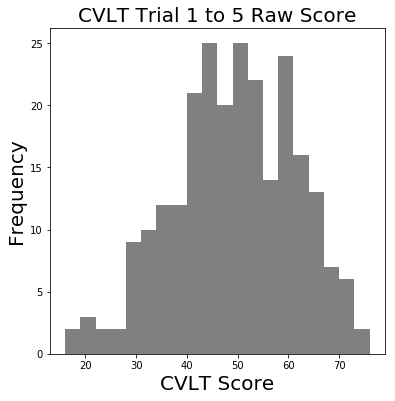

In [12]:
plt.figure(figsize=(6,6))
plt.hist(sub_oc[:,154], color='grey', bins=20)
plt.title('CVLT Trial 1 to 5 Raw Score', fontsize=20)
plt.xlabel('CVLT Score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/cvlt_hist.pdf')
plt.show()

## RPQ

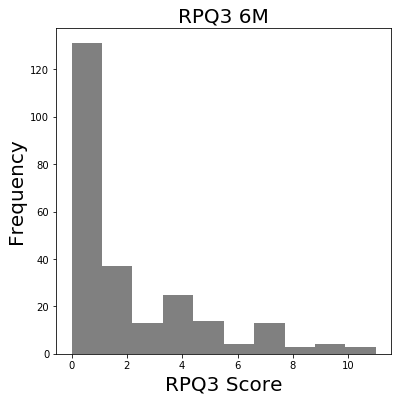

In [13]:
plt.figure(figsize=(6,6))
plt.hist(sub_oc[:,93], color='grey')
plt.title('RPQ3 6M', fontsize=20)
plt.xlabel('RPQ3 Score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/rpq3_hist.pdf')
plt.show()